## Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import stats, boxcox

In [2]:
# Column names
columns = ['COUNTRY', 'YEAR', 'STATUS', 'LIFE EXPECTANCY', 'ADULT MORTALITY', 'INFANT DEATHS', 'ALCOHOL',
          'PERCENT EXPENDITURE', 'HEPATITIS B', 'MEASLES', 'BMI', 'UNDER-FIVE DEATHS', 'POLIO', 'TOTAL EXPENDITURE',
          'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS 1-19', 'THINNESS 5-9', 'INCOME COMPOSITION OF RESOURCES',
          'SCHOOLING']

# Create df
life = pd.read_csv('../data/Life Expectancy Data.csv', names=columns, skiprows=1)

## Data Cleaning

In [3]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2928 non-null float64
ADULT MORTALITY                    2928 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2744 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2385 non-null float64
MEASLES                            2938 non-null int64
BMI                                2904 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2919 non-null float64
TOTAL EXPENDITURE                  2712 non-null float64
DIPHTHERIA                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [4]:
life.head()

,COUNTRY,YEAR,STATUS,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,...,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life.describe()

,YEAR,LIFE EXPECTANCY,ADULT MORTALITY,INFANT DEATHS,ALCOHOL,PERCENT EXPENDITURE,HEPATITIS B,MEASLES,BMI,UNDER-FIVE DEATHS,POLIO,TOTAL EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS 1-19,THINNESS 5-9,INCOME COMPOSITION OF RESOURCES,SCHOOLING
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Missing Values 

In [6]:
# Review unique values in columns to see if any abnormal / null values
for column in columns:
    print('------------------------------------\n',
          'Unique values for {} \n'.format(column),
          '-----------------------------------\n',
          life[column].unique())

------------------------------------
 Unique values for COUNTRY 
 -----------------------------------
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bi

When it comes to handling missing values in a dataset, it seems there are two primary approaches:

1. Remove the row(s) completely
2. Fill in missing values with unharmful values

Since we're not dealing with tens of thousands of records, I decided to populate the missing values with unharmful values. Interpolation is a common approach, especially with time-series data and it requires a meaningful ordering of the observations and a trend in the ordered data. Due to these unique circumstances, I decided to use imputation instead (mean, median).

In [7]:
# Split variables with null into two lists
columns_median = ['GDP', 'POPULATION']

columns_mean = ['LIFE EXPECTANCY', 'ADULT MORTALITY', 'ALCOHOL', 'HEPATITIS B', 'BMI', 'POLIO', 'TOTAL EXPENDITURE',
                'DIPHTHERIA', 'THINNESS 1-19', 'THINNESS 5-9', 'INCOME COMPOSITION OF RESOURCES', 'SCHOOLING']

In [8]:
# Fill in null values with median statistic
for column in columns_median:
    life[column].fillna(life[column].median(), inplace=True)
    
# Fill in null values with mean statistic
for column in columns_mean:
    life[column].fillna(life[column].mean(), inplace=True)

In [9]:
# Review .info method to see if any null values exist
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
COUNTRY                            2938 non-null object
YEAR                               2938 non-null int64
STATUS                             2938 non-null object
LIFE EXPECTANCY                    2938 non-null float64
ADULT MORTALITY                    2938 non-null float64
INFANT DEATHS                      2938 non-null int64
ALCOHOL                            2938 non-null float64
PERCENT EXPENDITURE                2938 non-null float64
HEPATITIS B                        2938 non-null float64
MEASLES                            2938 non-null int64
BMI                                2938 non-null float64
UNDER-FIVE DEATHS                  2938 non-null int64
POLIO                              2938 non-null float64
TOTAL EXPENDITURE                  2938 non-null float64
DIPHTHERIA                         2938 non-null float64
HIV/AIDS                           2938 non-null

In reviewing the results of ```life.info()```, we see there are no null values.

### Outlier Detection / Data cleaning

Some machine learning models are sensitive to extreme values. These outliers skew the descriptive statistics of the data and need to be appropriately handled. To help detect outliers, I will use box plot and histogram visualizations for each variable.

When treating outliers, there are a few different approaches:

1. Drop the outliers from the dataset
2. Cap the values of the outliers by assigning them new values
3. Transform the outliers into something harmless for analysis

In my analysis, I am planning on capping the values using one-way and two-way winsorization and transforming the outliers using methods such as log transformation.

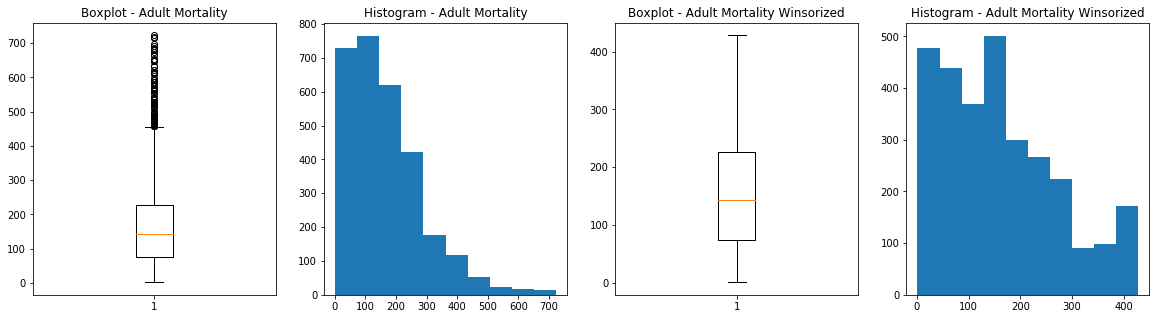

In [67]:
# Adult mortality winsorized
adult_mort_winsorized = winsorize(life['ADULT MORTALITY'], (0, 0.04))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['ADULT MORTALITY'])
plt.title('Boxplot - Adult Mortality')

plt.subplot(1, 4, 2)
plt.hist(life['ADULT MORTALITY'])
plt.title('Histogram - Adult Mortality')

plt.subplot(1, 4, 3)
plt.boxplot(adult_mort_winsorized)
plt.title('Boxplot - Adult Mortality Winsorized')

plt.subplot(1, 4, 4)
plt.hist(adult_mort_winsorized)
plt.title('Histogram - Adult Mortality Winsorized')

plt.show()

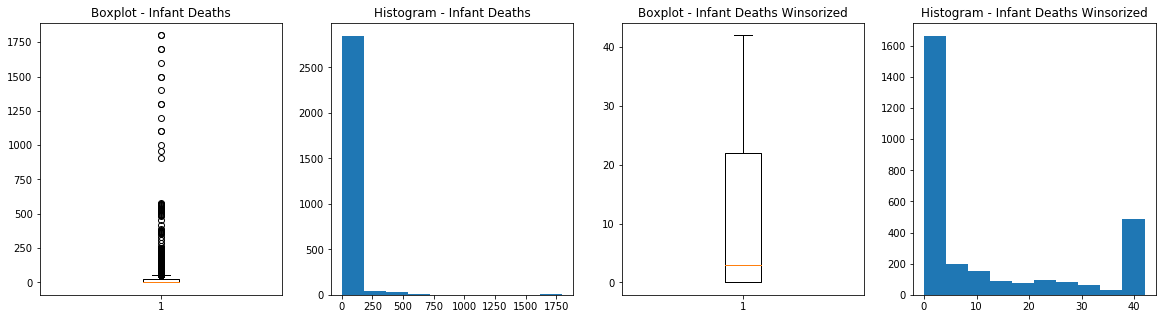

In [55]:
# Infant deaths winsorized
infant_deaths_winsorized = winsorize(life['INFANT DEATHS'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['INFANT DEATHS'])
plt.title('Boxplot - Infant Deaths')

plt.subplot(1, 4, 2)
plt.hist(life['INFANT DEATHS'])
plt.title('Histogram - Infant Deaths')

plt.subplot(1, 4, 3)
plt.boxplot(infant_deaths_winsorized)
plt.title('Boxplot - Infant Deaths Winsorized')

plt.subplot(1, 4, 4)
plt.hist(infant_deaths_winsorized)
plt.title('Histogram - Infant Deaths Winsorized')

plt.show()

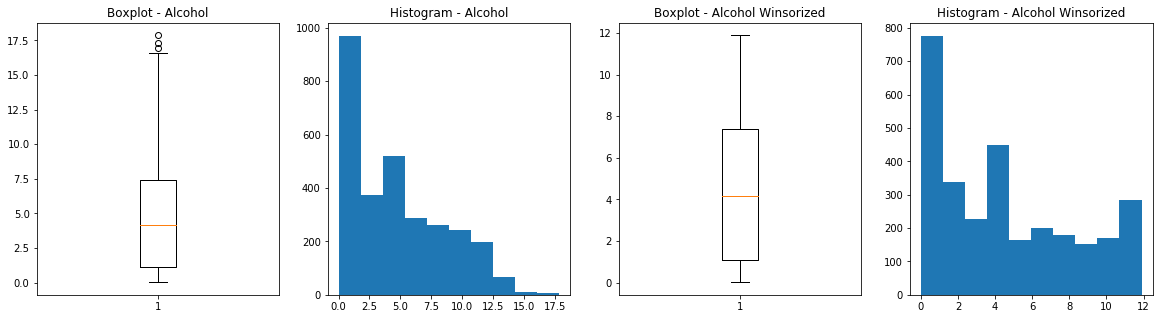

In [58]:
# Alcohol winsorized
alcohol_winsorized = winsorize(life['ALCOHOL'], (0, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['ALCOHOL'])
plt.title('Boxplot - Alcohol')

plt.subplot(1, 4, 2)
plt.hist(life['ALCOHOL'])
plt.title('Histogram - Alcohol')

plt.subplot(1, 4, 3)
plt.boxplot(alcohol_winsorized)
plt.title('Boxplot - Alcohol Winsorized')

plt.subplot(1, 4, 4)
plt.hist(alcohol_winsorized)
plt.title('Histogram - Alcohol Winsorized')

plt.show()

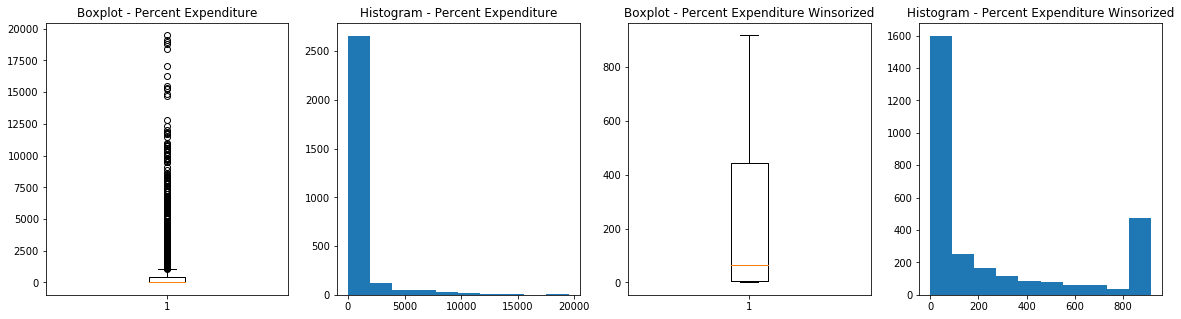

In [69]:
# Percent expenditure winsorized
percent_exp_winsorized = winsorize(life['PERCENT EXPENDITURE'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['PERCENT EXPENDITURE'])
plt.title('Boxplot - Percent Expenditure')

plt.subplot(1, 4, 2)
plt.hist(life['PERCENT EXPENDITURE'])
plt.title('Histogram - Percent Expenditure')

plt.subplot(1, 4, 3)
plt.boxplot(percent_exp_winsorized)
plt.title('Boxplot - Percent Expenditure Winsorized')

plt.subplot(1, 4, 4)
plt.hist(percent_exp_winsorized)
plt.title('Histogram - Percent Expenditure Winsorized')

plt.show()

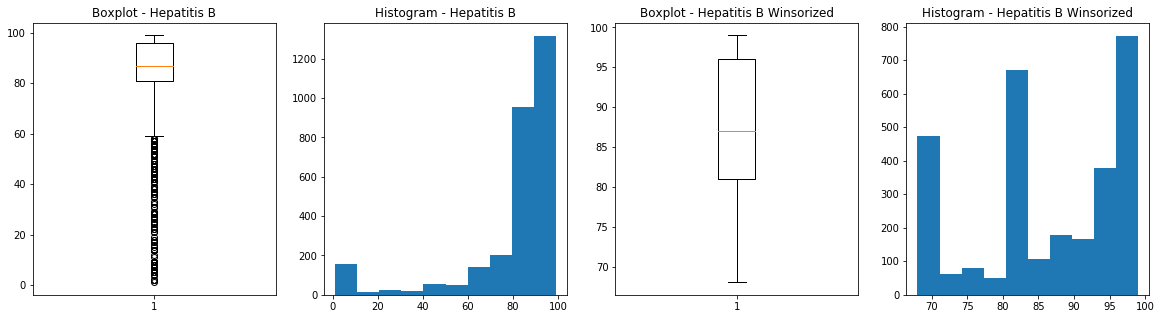

In [71]:
# Hepatitis B winsorized
hep_winsorized = winsorize(life['HEPATITIS B'], (0.15, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['HEPATITIS B'])
plt.title('Boxplot - Hepatitis B')

plt.subplot(1, 4, 2)
plt.hist(life['HEPATITIS B'])
plt.title('Histogram - Hepatitis B')

plt.subplot(1, 4, 3)
plt.boxplot(hep_winsorized)
plt.title('Boxplot - Hepatitis B Winsorized')

plt.subplot(1, 4, 4)
plt.hist(hep_winsorized)
plt.title('Histogram - Hepatitis B Winsorized')

plt.show()

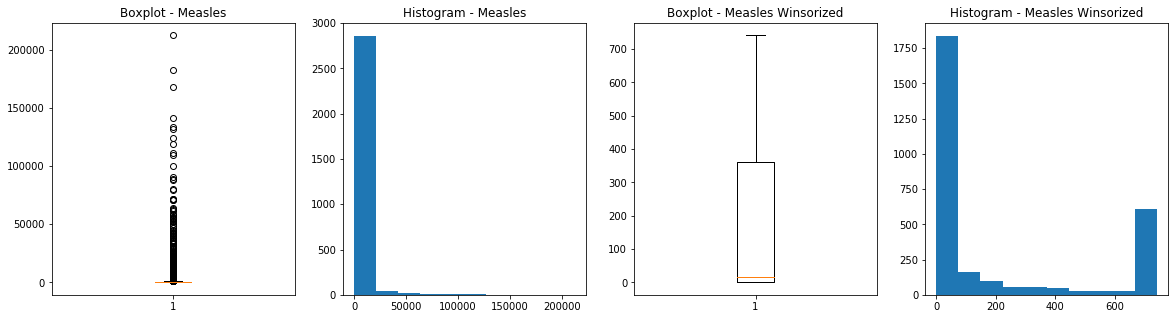

In [15]:
# Measles winsorized
measles_winsorized = winsorize(life['MEASLES'], (0, 0.20))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['MEASLES'])
plt.title('Boxplot - Measles')

plt.subplot(1, 4, 2)
plt.hist(life['MEASLES'])
plt.title('Histogram - Measles')

plt.subplot(1, 4, 3)
plt.boxplot(measles_winsorized)
plt.title('Boxplot - Measles Winsorized')

plt.subplot(1, 4, 4)
plt.hist(measles_winsorized)
plt.title('Histogram - Measles Winsorized')

plt.show()

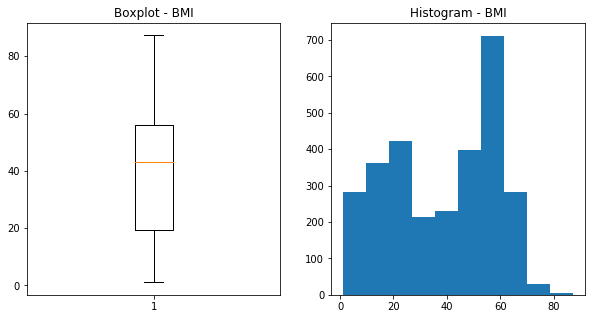

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(life['BMI'])
plt.title('Boxplot - BMI')

plt.subplot(1, 2, 2)
plt.hist(life['BMI'])
plt.title('Histogram - BMI')

plt.show()

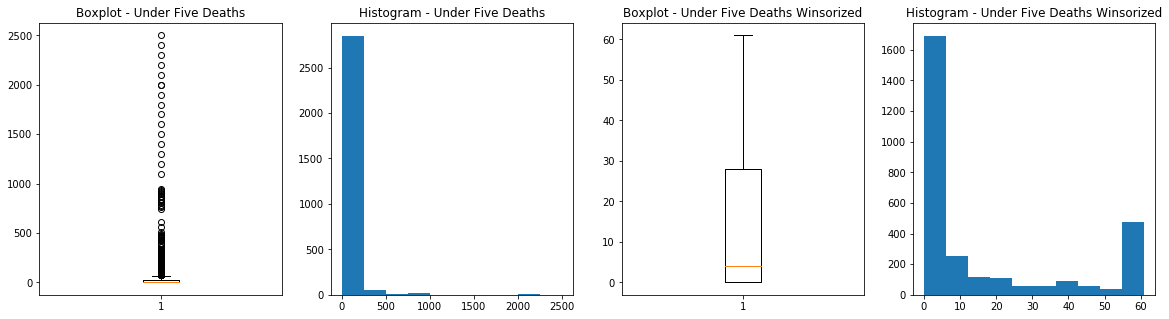

In [17]:
# Under-five deaths winsorized
under_five_winsorized = winsorize(life['UNDER-FIVE DEATHS'], (0, 0.15))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['UNDER-FIVE DEATHS'])
plt.title('Boxplot - Under Five Deaths')

plt.subplot(1, 4, 2)
plt.hist(life['UNDER-FIVE DEATHS'])
plt.title('Histogram - Under Five Deaths')

plt.subplot(1, 4, 3)
plt.boxplot(under_five_winsorized)
plt.title('Boxplot - Under Five Deaths Winsorized')

plt.subplot(1, 4, 4)
plt.hist(under_five_winsorized)
plt.title('Histogram - Under Five Deaths Winsorized')

plt.show()

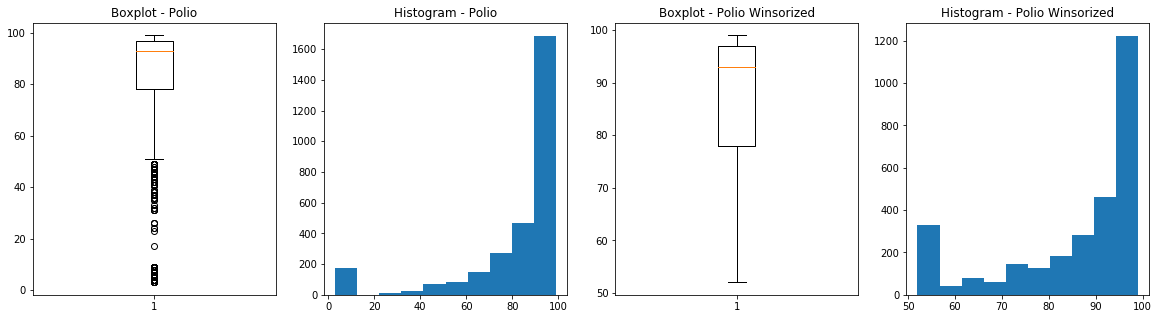

In [75]:
# Polio winsorized
polio_winsorized = winsorize(life['POLIO'], (0.10, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['POLIO'])
plt.title('Boxplot - Polio')

plt.subplot(1, 4, 2)
plt.hist(life['POLIO'])
plt.title('Histogram - Polio')

plt.subplot(1, 4, 3)
plt.boxplot(polio_winsorized)
plt.title('Boxplot - Polio Winsorized')

plt.subplot(1, 4, 4)
plt.hist(polio_winsorized)
plt.title('Histogram - Polio Winsorized')

plt.show()

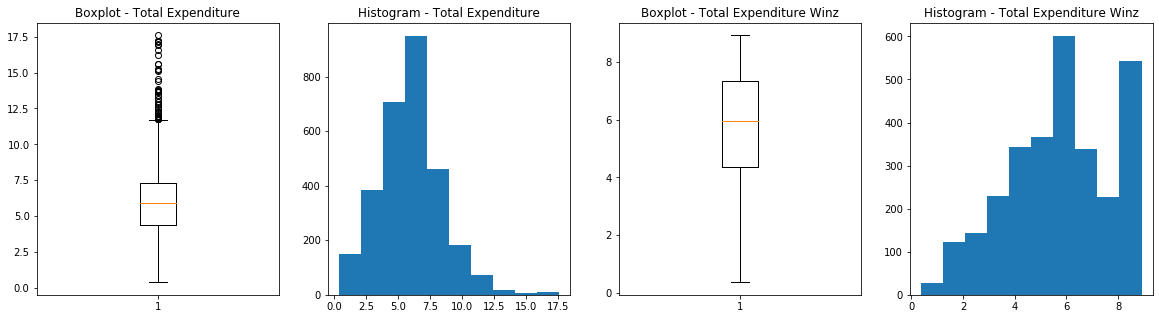

In [79]:
# Total Expenditure winsorized
total_exp_winsorized = winsorize(life['TOTAL EXPENDITURE'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['TOTAL EXPENDITURE'])
plt.title('Boxplot - Total Expenditure')

plt.subplot(1, 4, 2)
plt.hist(life['TOTAL EXPENDITURE'])
plt.title('Histogram - Total Expenditure')

plt.subplot(1, 4, 3)
plt.boxplot(total_exp_winsorized)
plt.title('Boxplot - Total Expenditure Winz')

plt.subplot(1, 4, 4)
plt.hist(total_exp_winsorized)
plt.title('Histogram - Total Expenditure Winz')

plt.show()

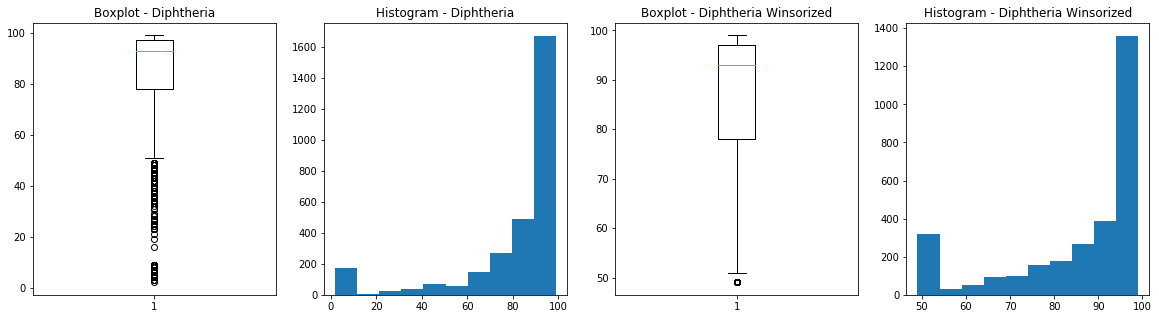

In [20]:
# Diphtheria winsorized
dip_winsorized = winsorize(life['DIPHTHERIA'], (0.10, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['DIPHTHERIA'])
plt.title('Boxplot - Diphtheria')

plt.subplot(1, 4, 2)
plt.hist(life['DIPHTHERIA'])
plt.title('Histogram - Diphtheria')

plt.subplot(1, 4, 3)
plt.boxplot(dip_winsorized)
plt.title('Boxplot - Diphtheria Winsorized')

plt.subplot(1, 4, 4)
plt.hist(dip_winsorized)
plt.title('Histogram - Diphtheria Winsorized')

plt.show()

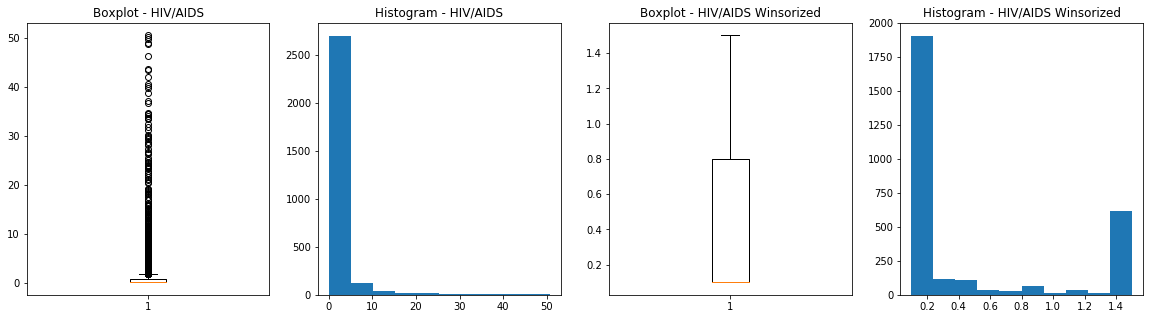

In [42]:
# HIV winsorized
hiv_winsorized = winsorize(life['HIV/AIDS'], (0, 0.20))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['HIV/AIDS'])
plt.title('Boxplot - HIV/AIDS')

plt.subplot(1, 4, 2)
plt.hist(life['HIV/AIDS'])
plt.title('Histogram - HIV/AIDS')

plt.subplot(1, 4, 3)
plt.boxplot(hiv_winsorized)
plt.title('Boxplot - HIV/AIDS Winsorized')

plt.subplot(1, 4, 4)
plt.hist(hiv_winsorized)
plt.title('Histogram - HIV/AIDS Winsorized')

plt.show()

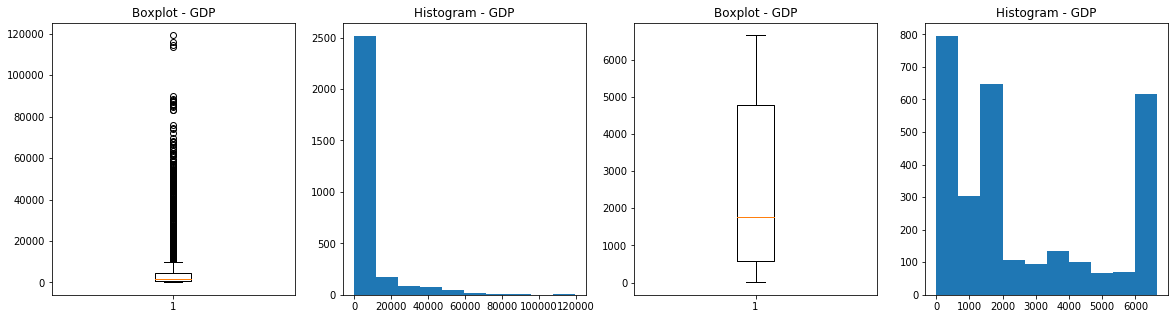

In [100]:
# GDP winsorized
gdp_winsorized = winsorize(life['GDP'], (0, 0.20))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['GDP'])
plt.title('Boxplot - GDP')

plt.subplot(1, 4, 2)
plt.hist(life['GDP'])
plt.title('Histogram - GDP')

plt.subplot(1, 4, 3)
plt.boxplot(gdp_winsorized)
plt.title('Boxplot - GDP')

plt.subplot(1, 4, 4)
plt.hist(gdp_winsorized)
plt.title('Histogram - GDP')

plt.show()

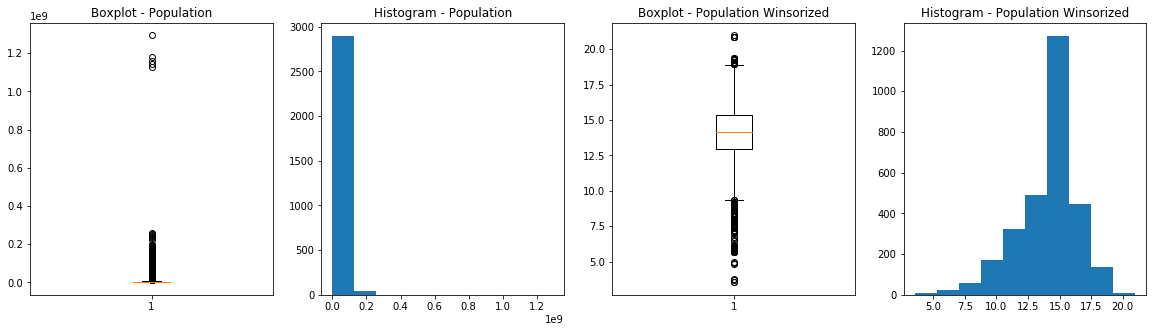

In [81]:
# Population winsorized
pop_winsorized = winsorize(life['POPULATION'], (0, 0.16))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['POPULATION'])
plt.title('Boxplot - Population')

plt.subplot(1, 4, 2)
plt.hist(life['POPULATION'])
plt.title('Histogram - Population')

plt.subplot(1, 4, 3)
plt.boxplot(np.log(life['POPULATION']))
plt.title('Boxplot - Population Winsorized')

plt.subplot(1, 4, 4)
plt.hist(np.log(life['POPULATION']))
plt.title('Histogram - Population Winsorized')

plt.show()

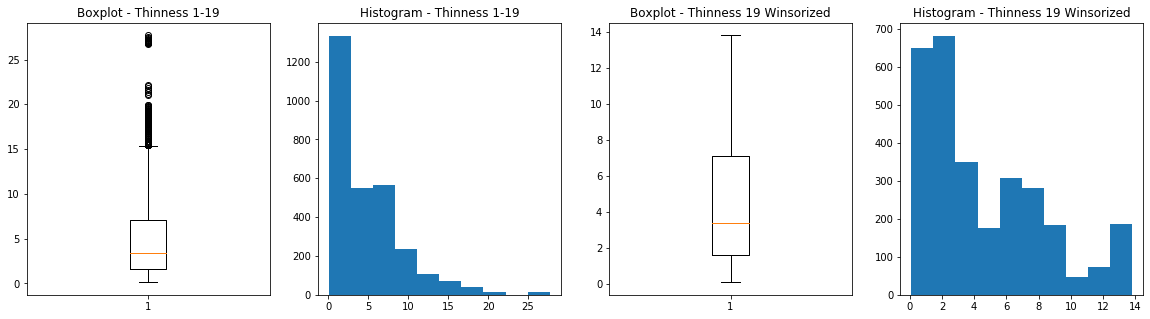

In [24]:
# Thinness 1-19 winsorized
thin_19_winsorized = winsorize(life['THINNESS 1-19'], (0, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['THINNESS 1-19'])
plt.title('Boxplot - Thinness 1-19')

plt.subplot(1, 4, 2)
plt.hist(life['THINNESS 1-19'])
plt.title('Histogram - Thinness 1-19')

plt.subplot(1, 4, 3)
plt.boxplot(thin_19_winsorized)
plt.title('Boxplot - Thinness 19 Winsorized')

plt.subplot(1, 4, 4)
plt.hist(thin_19_winsorized)
plt.title('Histogram - Thinness 19 Winsorized')

plt.show()

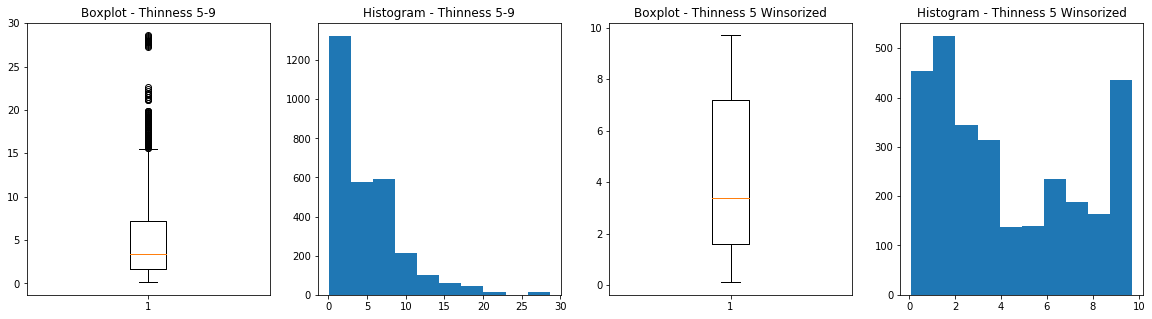

In [25]:
# Thinness 5 winsorized
thin_5_winsorized = winsorize(life['THINNESS 5-9'], (0, 0.10))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['THINNESS 5-9'])
plt.title('Boxplot - Thinness 5-9')

plt.subplot(1, 4, 2)
plt.hist(life['THINNESS 5-9'])
plt.title('Histogram - Thinness 5-9')

plt.subplot(1, 4, 3)
plt.boxplot(thin_5_winsorized)
plt.title('Boxplot - Thinness 5 Winsorized')

plt.subplot(1, 4, 4)
plt.hist(thin_5_winsorized)
plt.title('Histogram - Thinness 5 Winsorized')

plt.show()

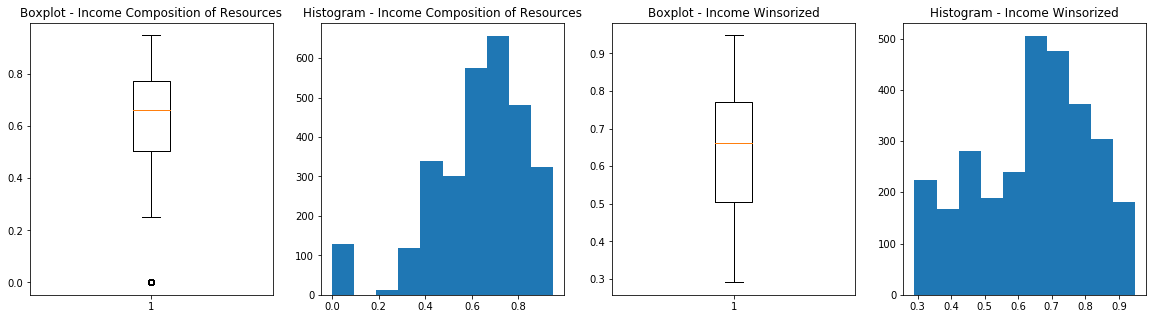

In [26]:
# Income composition winsorized
income_winsorized = winsorize(life['INCOME COMPOSITION OF RESOURCES'], (0.05, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['INCOME COMPOSITION OF RESOURCES'])
plt.title('Boxplot - Income Composition of Resources')

plt.subplot(1, 4, 2)
plt.hist(life['INCOME COMPOSITION OF RESOURCES'])
plt.title('Histogram - Income Composition of Resources')

plt.subplot(1, 4, 3)
plt.boxplot(income_winsorized)
plt.title('Boxplot - Income Winsorized')

plt.subplot(1, 4, 4)
plt.hist(income_winsorized)
plt.title('Histogram - Income Winsorized')

plt.show()

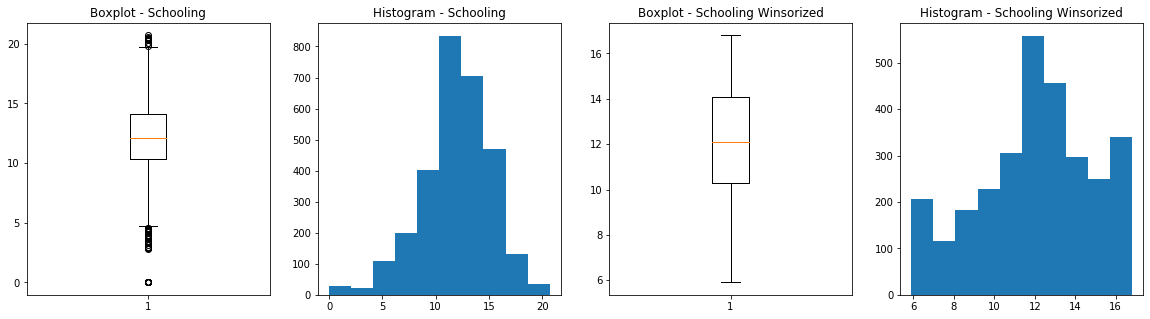

In [83]:
# Schooling winsorized
school_winsorized = winsorize(life['SCHOOLING'], (0.05, 0.05))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['SCHOOLING'])                          
plt.title('Boxplot - Schooling')

plt.subplot(1, 4, 2)
plt.hist(life['SCHOOLING'])
plt.title('Histogram - Schooling')

plt.subplot(1, 4, 3)
plt.boxplot(school_winsorized)
plt.title('Boxplot - Schooling Winsorized')

plt.subplot(1, 4, 4)
plt.hist(school_winsorized)
plt.title('Histogram - Schooling Winsorized')

plt.show()

After outlier detection and treatment, I will explore the target variable and the relationship it has with other variables.

### Data Exploration / Feature Selection

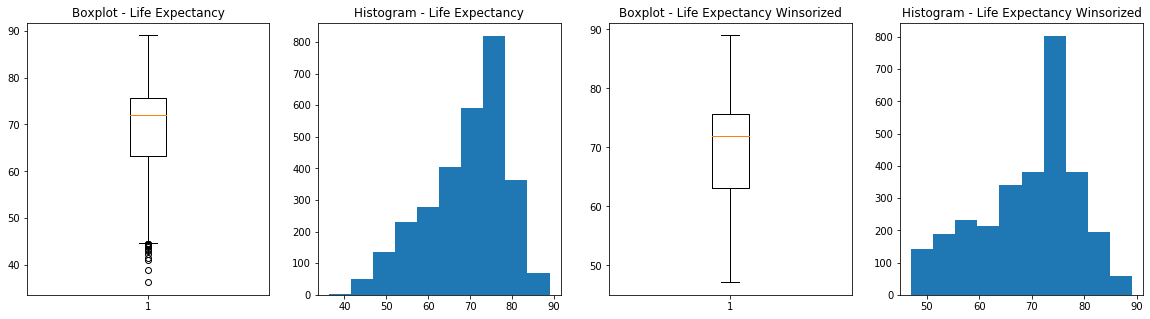

In [28]:
# Life expectancy winsorized
life_exp_winsorized = winsorize(life['LIFE EXPECTANCY'], (0.02, 0))

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.boxplot(life['LIFE EXPECTANCY'])
plt.title('Boxplot - Life Expectancy')

plt.subplot(1, 4, 2)
plt.hist(life['LIFE EXPECTANCY'])
plt.title('Histogram - Life Expectancy')

plt.subplot(1, 4, 3)
plt.boxplot(life_exp_winsorized)
plt.title('Boxplot - Life Expectancy Winsorized')

plt.subplot(1, 4, 4)
plt.hist(life_exp_winsorized)
plt.title('Histogram - Life Expectancy Winsorized')

plt.show()

In [103]:
# Create copy of life df
life_winsorized = life.copy()

In [104]:
# Add winsorized variables to df
life_winsorized['LIFE EXP WINSORIZED'] = life_exp_winsorized
life_winsorized['ADULT MORT WINSORIZED'] = adult_mort_winsorized
life_winsorized['INFANT DEATHS WINSORIZED'] = infant_deaths_winsorized
life_winsorized['ALCOHOL WINSORIZED'] = alcohol_winsorized
life_winsorized['PERCENT EXP WINSORIZED'] = percent_exp_winsorized
life_winsorized['HEP WINSORIZED'] = hep_winsorized
life_winsorized['MEASLES WINSORIZED'] = measles_winsorized
life_winsorized['UNDER FIVE WINSORIZED'] = under_five_winsorized
life_winsorized['POLIO WINSORIZED'] = polio_winsorized
life_winsorized['TOTAL EXP WINSORIZED'] = total_exp_winsorized
life_winsorized['DIP WINSORIZED'] = dip_winsorized
life_winsorized['HIV WINSORIZED'] = hiv_winsorized
life_winsorized['GDP WINSORIZED'] = gdp_winsorized
life_winsorized['THIN 19 WINSORIZED'] = thin_19_winsorized
life_winsorized['THIN 5 WINSORIZED'] = thin_5_winsorized
life_winsorized['SCHOOL WINSORIZED'] = school_winsorized

life_winsorized.drop(['LIFE EXPECTANCY', 'ADULT MORTALITY', 'INFANT DEATHS', 'ALCOHOL',
                     'PERCENT EXPENDITURE', 'HEPATITIS B', 'MEASLES', 'UNDER-FIVE DEATHS',
                     'POLIO', 'TOTAL EXPENDITURE', 'DIPHTHERIA', 'HIV/AIDS', 'GDP',
                     'THINNESS 1-19', 'THINNESS 5-9', 'SCHOOLING'], axis=1, inplace=True)

In [105]:
# Correlation matrix
life_winsorized.corr()

,YEAR,BMI,POPULATION,INCOME COMPOSITION OF RESOURCES,LIFE EXP WINSORIZED,ADULT MORT WINSORIZED,INFANT DEATHS WINSORIZED,ALCOHOL WINSORIZED,PERCENT EXP WINSORIZED,HEP WINSORIZED,MEASLES WINSORIZED,UNDER FIVE WINSORIZED,POLIO WINSORIZED,TOTAL EXP WINSORIZED,DIP WINSORIZED,HIV WINSORIZED,GDP WINSORIZED,THIN 19 WINSORIZED,THIN 5 WINSORIZED,SCHOOL WINSORIZED
YEAR,1.000000,0.108327,0.014027,0.236333,0.167653,-0.063473,-0.047784,-0.045999,0.034195,0.166788,-0.115141,-0.052350,0.116654,0.068140,0.147497,-0.084387,0.157482,-0.049687,-0.039406,0.196965
BMI,0.108327,1.000000,-0.069700,0.479837,0.561773,-0.394988,-0.453518,0.318449,0.332565,0.207550,-0.314678,-0.470237,0.342230,0.223055,0.337845,-0.486732,0.399395,-0.561048,-0.584414,0.543520
POPULATION,0.014027,-0.069700,1.000000,-0.015014,-0.029541,-0.002858,0.207944,-0.026768,-0.027539,-0.087034,0.171152,0.205599,-0.068710,-0.063445,-0.058786,-0.019331,-0.038253,0.118814,0.077852,-0.041636
INCOME COMPOSITION OF RESOURCES,0.236333,0.479837,-0.015014,1.000000,0.694848,-0.454537,-0.405087,0.417650,0.488416,0.268306,-0.211597,-0.421199,0.445241,0.155620,0.445957,-0.517558,0.550871,-0.438354,-0.451541,0.790714
LIFE EXP WINSORIZED,0.167653,0.561773,-0.029541,0.694848,1.000000,-0.689274,-0.586140,0.397974,0.489543,0.329108,-0.338550,-0.610801,0.574086,0.217214,0.573406,-0.796889,0.543108,-0.533974,-0.592561,0.749656
ADULT MORT WINSORIZED,-0.063473,-0.394988,-0.002858,-0.454537,-0.689274,1.000000,0.395555,-0.203878,-0.322978,-0.226039,0.213770,0.413561,-0.359501,-0.128153,-0.354143,0.599863,-0.344079,0.357310,0.413825,-0.472496
INFANT DEATHS WINSORIZED,-0.047784,-0.453518,0.207944,-0.405087,-0.586140,0.395555,1.000000,-0.343764,-0.365693,-0.331883,0.578835,0.995683,-0.434299,-0.155664,-0.416975,0.433051,-0.400761,0.449017,0.462787,-0.542980
ALCOHOL WINSORIZED,-0.045999,0.318449,-0.026768,0.417650,0.397974,-0.203878,-0.343764,1.000000,0.379105,0.109295,-0.196227,-0.339962,0.264761,0.313922,0.265227,-0.200914,0.399075,-0.444087,-0.451469,0.525848
PERCENT EXP WINSORIZED,0.034195,0.332565,-0.027539,0.488416,0.489543,-0.322978,-0.365693,0.379105,1.000000,0.132592,-0.199501,-0.366788,0.271274,0.172891,0.268288,-0.304622,0.836873,-0.336959,-0.358586,0.536447
HEP WINSORIZED,0.166788,0.207550,-0.087034,0.268306,0.329108,-0.226039,-0.331883,0.109295,0.132592,1.000000,-0.264660,-0.338784,0.629834,0.062566,0.646446,-0.304478,0.211510,-0.135143,-0.134006,0.309247


After conducting the above correlation matrix, I identified the variables that have the strongest positive relationship with life expectancy and generated another correlation matrix along with a heatmap for easier analysis.

In [32]:
# Correlation matrix using variables that have a positive relationship with life expectancy
life_winsorized[['LIFE EXP WINSORIZED', 'BMI', 'INCOME COMPOSITION OF RESOURCES', 
                 'POLIO WINSORIZED', 'DIP WINSORIZED', 'GDP WINSORIZED', 'SCHOOL WINSORIZED']].corr()

,LIFE EXP WINSORIZED,BMI,INCOME COMPOSITION OF RESOURCES,POLIO WINSORIZED,DIP WINSORIZED,GDP WINSORIZED,SCHOOL WINSORIZED
LIFE EXP WINSORIZED,1.000000,0.561773,0.694848,0.574086,0.573406,0.510884,0.749656
BMI,0.561773,1.000000,0.479837,0.342230,0.337845,0.346169,0.543520
INCOME COMPOSITION OF RESOURCES,0.694848,0.479837,1.000000,0.445241,0.445957,0.526737,0.790714
POLIO WINSORIZED,0.574086,0.342230,0.445241,1.000000,0.849930,0.294983,0.519562
DIP WINSORIZED,0.573406,0.337845,0.445957,0.849930,1.000000,0.280093,0.513768
GDP WINSORIZED,0.510884,0.346169,0.526737,0.294983,0.280093,1.000000,0.565455
SCHOOL WINSORIZED,0.749656,0.543520,0.790714,0.519562,0.513768,0.565455,1.000000


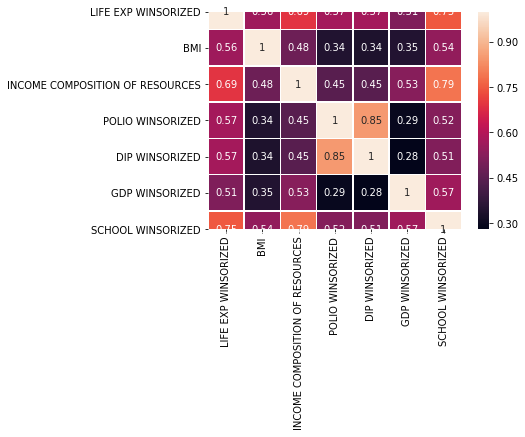

In [33]:
# Heatmap
sns.heatmap(life_winsorized[['LIFE EXP WINSORIZED', 'BMI', 'INCOME COMPOSITION OF RESOURCES', 
                             'POLIO WINSORIZED', 'DIP WINSORIZED', 'GDP WINSORIZED', 'SCHOOL WINSORIZED']].corr(),
           square=True,
           annot=True,
           linewidths=0.5)

After analyzing the correlation matrices and heatmap, I think the variables that have the strongest relationship with life expectancy and should be treated as the features are:

1. Schooling
2. Income composition of resources
3. Polio
4. Diphtheria
5. BMI
6. GDP